In [1]:
%load_ext autoreload
%autoreload 2

In [20]:
from pathlib import Path

import pandas as pd

# Path to a benchmark CSV, e.g. produced by bench-mphf-hashing
DATA_ROOT = Path("../..") / "data"
# CSV_PATH = DATA_ROOT / "mphf_hashing_bench_full.csv"
# CSV_PATH = DATA_ROOT / "mphf_hashing_glgh_vs.csv"
CSV_PATH = DATA_ROOT / "mphf_hashing_all_strats_release.csv"

df = pd.read_csv(CSV_PATH)
bkp = df.copy()

In [27]:
df.to_markdown()

'|    | strategy                      |        n |     seed |   build_time_us |   query_time_us |   query_time_ns_per_key |   size_bytes |   bits_per_key |        m |   m_over_n |   retries |   build_success |\n|---:|:------------------------------|---------:|---------:|----------------:|----------------:|------------------------:|-------------:|---------------:|---------:|-----------:|----------:|----------------:|\n|  0 | BaselineStorage               |      100 |      142 |             745 |              26 |                52       |          208 |       16.64    |      143 |    1.43    |         0 |               1 |\n|  1 | PackedTritStorage_ExplicitB   |      100 |      142 |              79 |              38 |                76       |          184 |       14.72    |      143 |    1.43    |         0 |               1 |\n|  2 | PackedTritStorage_CompressedB |      100 |      142 |              73 |             261 |               522       |          234 |       18.72    |     

In [22]:
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8-darkgrid")

strategies = df["strategy"].unique()
strategies

array(['BaselineStorage', 'PackedTritStorage_ExplicitB',
       'PackedTritStorage_CompressedB', 'GlGhStorage', 'PTHash_single',
       'PTHash_partitioned', 'PTHash_dense'], dtype=object)

In [23]:
bkp = df.copy()
df = bkp[
    bkp["strategy"].isin(
        [
            "BaselineStorage",
            "PackedTritStorage_ExplicitB",
            "PackedTritStorage_CompressedB",
            "GlGhStorage",
            "PTHash_single",
            "PTHash_partitioned",
            "PTHash_dense",
        ]
    )
].copy()

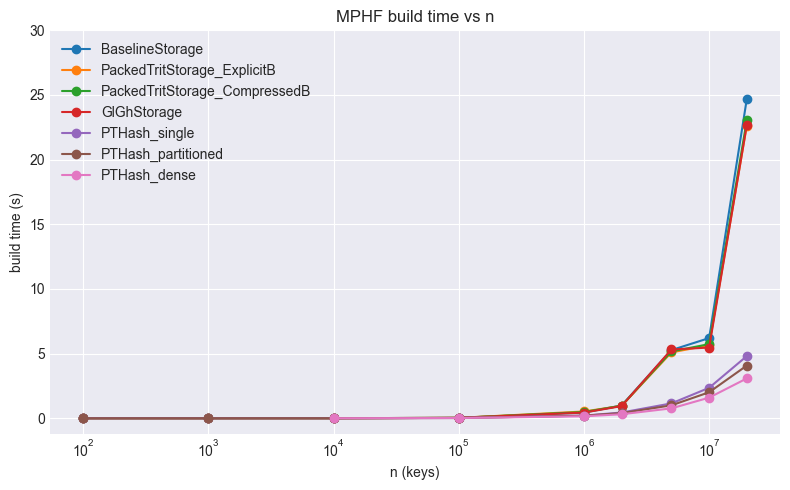

In [24]:
# Build time vs n (seconds) per strategy
fig, ax = plt.subplots(figsize=(8, 5))

for s in strategies:
    sub = df[df["strategy"] == s].sort_values(by="n")
    sub = sub[(sub["build_time_us"] > 0) & (sub["query_time_ns_per_key"] > 0) & (sub["bits_per_key"] > 0)]
    if not sub.empty:
        ax.plot(sub["n"], sub["build_time_us"] / 1e6, marker="o", label=s)

ax.set_xscale("log")
ax.set_xlabel("n (keys)")
ax.set_ylabel("build time (s)")
ax.set_title("MPHF build time vs n")
ax.legend()

# Ticks Y cada 5 segundos
import numpy as np
max_build_s = (df["build_time_us"].max() / 1e6)
yticks = np.arange(0, max_build_s + 10, 5)
ax.set_yticks(yticks)

fig.tight_layout()


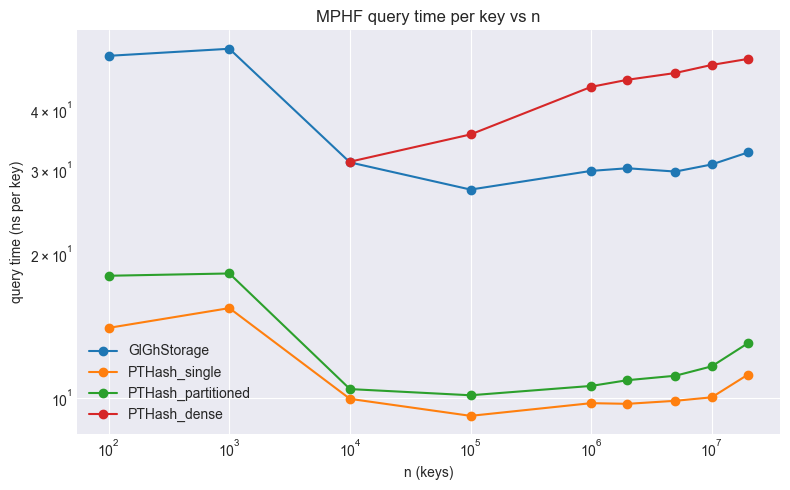

In [14]:
# Query time per key vs n (ns) per strategy
fig, ax = plt.subplots(figsize=(8, 5))

for s in strategies:
    sub = df[df["strategy"] == s].sort_values(by="n")
    sub = sub[(sub["build_time_us"] > 0) & (sub["query_time_ns_per_key"] > 0) & (sub["bits_per_key"] > 0)]
    if not sub.empty:
        ax.plot(sub["n"], sub["query_time_ns_per_key"], marker="o", label=s)

ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("n (keys)")
ax.set_ylabel("query time (ns per key)")
ax.set_title("MPHF query time per key vs n")
ax.legend()

# Más líneas horizontales: ticks en 100, 150, 200, 250, 300, 350, 400
# import numpy as np
# yticks = [50, 100, 150, 200, 250, 300, 350, 400]
# ax.set_yticks(yticks)

fig.tight_layout()

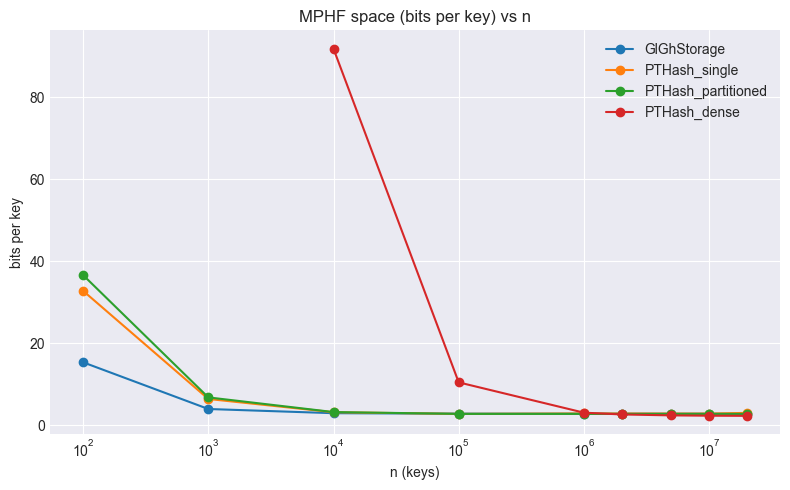

In [15]:
# Bits per key vs n per strategy
fig, ax = plt.subplots(figsize=(8, 5))

for s in strategies:
    sub = df[df["strategy"] == s].sort_values(by="n")
    sub = sub[(sub["build_time_us"] > 0) & (sub["query_time_ns_per_key"] > 0) & (sub["bits_per_key"] > 0)]
    if not sub.empty:
        ax.plot(sub["n"], sub["bits_per_key"], marker="o", label=s)

ax.set_xscale("log")
ax.set_xlabel("n (keys)")
ax.set_ylabel("bits per key")
ax.set_title("MPHF space (bits per key) vs n")
ax.legend()
fig.tight_layout()


In [16]:
size = 20_000_000

results = df[df["n"] == size][["strategy", "build_time_us", "query_time_ns_per_key", "bits_per_key"]].copy()
results["Build time (s)"] = results["build_time_us"] / 1e6
results["Query time (ns/key)"] = results["query_time_ns_per_key"]
results["Bits per key"] = results["bits_per_key"]
results = results[["strategy", "Build time (s)", "Query time (ns/key)", "Bits per key"]].round(2)
results


,strategy,Build time (s),Query time (ns/key),Bits per key
59,GlGhStorage,22.69,32.63,2.81
60,PTHash_single,4.81,11.18,3.02
61,PTHash_partitioned,4.07,13.01,2.77
62,PTHash_dense,3.08,51.23,2.30
